## Task A3. The effect of social distancing (worth approximately 12% of the marks)

The introduction and/or removal of social distancing can be modelled by varying the infection rate parameter, $\beta$. In this exercise, we will use the following time-dependent infection rate parameter:

$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

**Assignment:** Using Python, run the deterministic SIR model for the social distancing strategy described above.

Details:
- For this task, use the values $\mu = 0.1$, $N = 10^{6}$, and assume that the initial values of $(S,I,R)$ are $(N-5,5,0)$.
- Run the SIR model, adapted according to the time-dependent value of $\beta$ described above, for a value of $T = 30$ days. Plot a time-series showing $S(t)$, $I(t)$ and $R(t)$.
- Consider a scenario in which $T$ is not necessarily 30 days, and can instead take a fixed integer value between 1 and 200 days. Write a FOR loop to identify the value of $T$ that minimises the maximum value of $I$ in the model simulation. Plot the maximum value of $I$ as a function of $T$, and print the value of $T$ that "flattens the curve" most.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

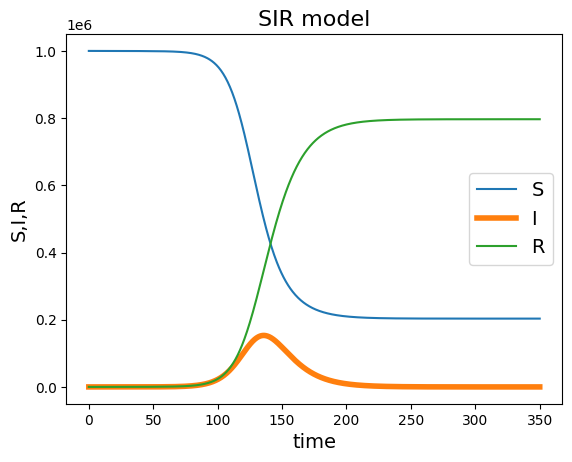

In [3]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define a function to give the RHS of the ODE system
def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = betafunc(t)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

# define a function for beta 
def betafunc(t):
    if t<T or t>T+30:
        return 2*10**-7
    if T<=t and t<=T+30:
        return 1.5*10**-7

# --- Problem setup --- #

# set up time grid for the solution
tf = 350
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# give the T value for the beta function
T=30

# Set initial conditions and put into array y0
S0 = 10**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

The value of T that 'flattens the curve' the most is: 99


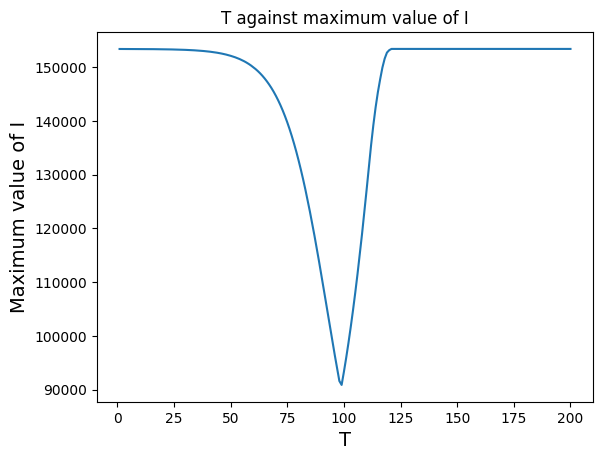

In [4]:
# create lists to be added to
T_list = []
I_list =[]

# loop through values of T to find the maximum value of I at each T
for T in range(1,201):
    T_list.append(T)
    y_sol = odeint(SIR, y0, t)
    I = y_sol[:,1]
    I_max=max(I)
    I_list.append(I_max)
    
# find the index of the 'flattest' I
I_min = np.where(I_list==min(I_list))
print("The value of T that 'flattens the curve' the most is:", T_list[I_min[0][0]])

# plots a graph of T against the maximum I values
plt.plot(T_list,I_list)
plt.title("T against maximum value of I")
plt.xlabel("T", fontsize=14)
plt.ylabel("Maximum value of I", fontsize=14)
plt.show()